In [ ]:
# import kagglehub
# import os
# import shutil

# # Define the path where you want to download the dataset
# desired_path = "C:/repos/ECDS-NeuralNets/Day 1/Dataset"

# # Download laval version
# default_path = kagglehub.dataset_download("uciml/iris")

# # Move the downloaded files to your desired directory
# shutil.move(default_path, desired_path)

# print("Path to dataset files:", desired_path)

In [69]:
import pandas as pd
iris_data = pd.read_csv(f'{desired_path}/2/Iris.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [70]:
iris_data.drop('Id', axis=1, inplace=True)

In [71]:
iris_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

![Alt text](https://miro.medium.com/v2/format:webp/1*pO5X2c28F1ysJhwnmPsy3Q.gif)

In [74]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define the Simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        # Input layer (4 features) -> Hidden layer (36 neurons)
        self.fc1 = nn.Linear(input_size, 36)
        # Hidden layer (36 neurons) -> Hidden layer (24 neurons)
        self.fc2 = nn.Linear(36, 24)
        # Hidden layer (24 neurons) -> Output layer (3 classes)
        self.fc3 = nn.Linear(24, 3)
        # ReLU activation function
        self.relu = nn.ReLU()
        # Softmax activation for multi-class classification
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass input through the network
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return self.softmax(x)


In [76]:
# Extract features and labels
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = iris_data.drop('Species', axis=1)  # Features (4 columns)
y = iris_data['Species']  # Original string labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert string labels into numeric labels

# Split the dataset into training and valing sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# # Check the shapes of the splits to confirm they match
# print("X_train shape:", X_train.shape)  # Should be (120, 4)
# print("y_train shape:", y_train.shape)  # Should be (120,)
# print("X_val shape:", X_val.shape)    # Should be (30, 4)
# print("y_val shape:", y_val.shape)    # Should be (30,)

# Convert to PyTorch tensors
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.LongTensor(y_train)  # Ensure y_train is in the correct format
X_val_tensor = torch.Tensor(X_val)
y_val_tensor = torch.LongTensor(y_val)

# # Verify tensor shapes
# print("X_train_tensor shape:", X_train_tensor.shape)  # Should be (120, 4)
# print("y_train_tensor shape:", y_train_tensor.shape)  # Should be (120,)
# print("X_val_tensor shape:", X_val_tensor.shape)    # Should be (30, 4)
# print("y_val_tensor shape:", y_val_tensor.shape)    # Should be (30,)


### Stochastic Gradient Descent (SGD) Formula:

$$
\theta = \theta - \eta \nabla J(\theta)
$$

where:
- \( \theta \): Model parameters (weights).
- \( \eta \): Learning rate (step size).
- \( \nabla J(\theta) \): Gradient of the loss function \(J\) with respect to the parameters \( \theta \).

### Explanation:
1. **Gradient \( \nabla J(\theta) \)**: Computes the direction and magnitude to adjust the parameters.
2. **Learning Rate \( \eta \)**: Controls how much the parameters are updated.
3. **Parameter Update**: \( \theta \) is updated in the direction that minimizes the loss.

For SGD, the gradient is computed using a single random sample or a small batch instead of the entire dataset, making it computationally efficient.<br>

![Alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp)
### Cross-Entropy Loss Formula:

$$
\mathcal{L} = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$

where:  
- \(C\) is the number of classes.  
- \(y_i\) is the actual label (1 if class \(i\) is the correct class, 0 otherwise).  
- \(\hat{y}_i\) is the predicted probability for class \(i\).


In [77]:
# Initialize model, loss, and optimizer
model = SimpleNN(input_size)
criterion = nn.CrossEntropyLoss()  # Same loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Changed to SGD

# Training loop
for epoch in range(100):  # Number of epochs
    model.train()  # Set model to training mode
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()  # Zero out gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update weights using SGD
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

# valing the model
model.eval()
with torch.no_grad():
    outputs = model(X_val_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_val, predicted)
    print(f'Accuracy on val set: {accuracy * 100:.2f}%')

Epoch [10/100], Loss: 1.1214
Epoch [20/100], Loss: 1.1034
Epoch [30/100], Loss: 1.0848
Epoch [40/100], Loss: 1.0650
Epoch [50/100], Loss: 1.0399
Epoch [60/100], Loss: 1.0043
Epoch [70/100], Loss: 0.9576
Epoch [80/100], Loss: 0.9098
Epoch [90/100], Loss: 0.8719
Epoch [100/100], Loss: 0.8445
Accuracy on val set: 70.00%


Confusion Matrix:
[[10  0  0]
 [ 0  4  5]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.44      0.62         9
           2       0.69      1.00      0.81        11

    accuracy                           0.83        30
   macro avg       0.90      0.81      0.81        30
weighted avg       0.89      0.83      0.82        30



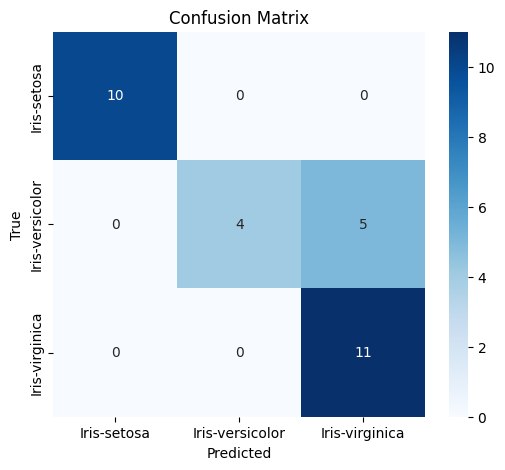

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluate the model on the val set
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    y_pred_tensor = model(X_val_tensor)
    _, y_pred = torch.max(y_pred_tensor, 1)  # Get the predicted classes

# Convert predictions and true labels to numpy arrays for scikit-learn functions
y_pred = y_pred.numpy()
y_val = y_val_tensor.numpy()

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_val, y_pred)
print("\nClassification Report:")
print(report)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()